In [1]:
import rlssm
import pandas as pd
import os

#### Import the grouped data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)
#data = data[data.participant == 20].reset_index(drop=True)

data['block_label'] += 1

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0
1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0
2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0
3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0
4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0


In [3]:
model = rlssm.RDModel_2A(hierarchical_levels=2, starting_point_bias=False)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_93acd7ef7c379e76d993fb3c5a4926c0 NOW.


In [4]:
# sampling parameters
n_iter = 5000
n_chains = 2
n_thin = 5

# bayesian model
drift_priors = None
threshold_priors = None
ndt_priors = None

In [5]:
model_fit = model.fit(
    data,
    drift_priors=drift_priors,
    threshold_priors=threshold_priors,
    ndt_priors=ndt_priors,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 1000 iterations ended with a divergence (0.0%)
0 of 1000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


#### get Rhat

In [6]:
model_fit.rhat.describe()

,rhat
count,116.000000
mean,1.053189
std,0.285620
min,0.998172
25%,0.999906
50%,1.002994
75%,1.010663
max,3.222410


In [7]:
model_fit.rhat.head()

,rhat,variable
0,1.055353,mu_ndt
1,1.111076,mu_threshold
2,1.030196,mu_drift_cor
3,1.017476,mu_drift_inc
4,1.035262,sd_ndt


#### get wAIC

In [8]:
model_fit.waic

{'lppd': -4974.524331182194,
 'p_waic': 207.16392260327547,
 'waic': 10363.37650757094,
 'waic_se': 257.77527206431984}

### Posteriors

In [9]:
model_fit.samples

,chain,draw,transf_mu_drift_cor,transf_mu_drift_inc,transf_mu_threshold,transf_mu_ndt,drift_cor_sbj[1],drift_cor_sbj[2],drift_cor_sbj[3],drift_cor_sbj[4],...,ndt_sbj[18],ndt_sbj[19],ndt_sbj[20],ndt_sbj[21],ndt_sbj[22],ndt_sbj[23],ndt_sbj[24],ndt_sbj[25],ndt_sbj[26],ndt_sbj[27]
0,0,96,2.024084,0.813195,1.679461,0.571327,2.212481,2.374955,2.100199,1.674838,...,0.600649,0.162315,0.569228,0.353015,0.637126,0.336681,0.564828,0.657409,0.594572,0.602657
1,0,253,2.154390,0.803259,1.701076,0.527562,2.366777,2.237352,2.242954,1.414345,...,0.506658,0.266585,0.732325,0.569860,0.585738,0.505971,0.575589,0.672755,0.599435,0.623567
2,0,346,1.932848,0.653274,1.832349,0.610736,2.337337,2.272466,2.131655,1.761665,...,0.558618,0.201252,0.621310,0.587833,0.497043,0.386546,0.529936,0.641226,0.580478,0.618171
3,0,164,2.118452,0.728736,1.891323,0.593597,2.428230,2.418022,2.252123,1.692155,...,0.583706,0.271444,0.507484,0.411292,0.557168,0.453308,0.502530,0.636780,0.586832,0.715582
4,0,234,2.067161,0.791120,2.007493,0.555400,2.000411,2.277085,2.351685,1.848537,...,0.583363,0.195113,0.570537,0.463449,0.557229,0.424492,0.418725,0.691018,0.591138,0.561365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,455,2.077349,0.743724,1.967561,0.515770,2.533336,2.198427,2.347209,1.779042,...,0.515215,0.209153,0.638985,0.500824,0.630344,0.367033,0.566903,0.695771,0.362031,0.667076
996,1,370,2.019995,0.540316,1.860530,0.533483,2.284487,2.488436,2.592761,1.581810,...,0.499680,0.260273,0.640643,0.522652,0.535091,0.482348,0.549581,0.689316,0.368562,0.629492
997,1,5,2.118212,0.686289,1.925044,0.554767,2.450450,2.405640,2.341872,1.546947,...,0.454892,0.265980,0.726397,0.473075,0.580583,0.460843,0.535467,0.680920,0.355521,0.696842
998,1,368,2.029029,0.895380,1.955192,0.552224,2.235962,2.358497,2.338999,1.621163,...,0.504883,0.201740,0.605645,0.561874,0.655566,0.466624,0.555265,0.635697,0.379285,0.715189


In [10]:
model_fit.trial_samples

OrderedDict([('drift_cor_t',
              array([[2.21248086, 2.21248086, 2.21248086, ..., 1.7943703 , 1.7943703 ,
                      1.7943703 ],
                     [2.36677659, 2.36677659, 2.36677659, ..., 1.80840157, 1.80840157,
                      1.80840157],
                     [2.33733654, 2.33733654, 2.33733654, ..., 1.77776646, 1.77776646,
                      1.77776646],
                     ...,
                     [2.45045006, 2.45045006, 2.45045006, ..., 1.69233088, 1.69233088,
                      1.69233088],
                     [2.23596214, 2.23596214, 2.23596214, ..., 1.69880564, 1.69880564,
                      1.69880564],
                     [2.32344349, 2.32344349, 2.32344349, ..., 1.72779118, 1.72779118,
                      1.72779118]])),
             ('drift_inc_t',
              array([[0.80187352, 0.80187352, 0.80187352, ..., 0.8945148 , 0.8945148 ,
                      0.8945148 ],
                     [1.04341399, 1.04341399, 1.04341399, .

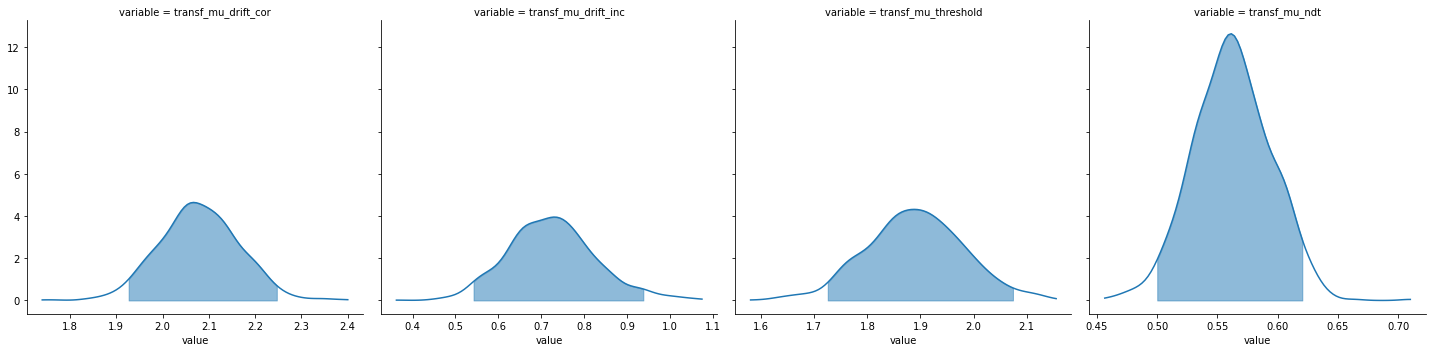

In [11]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

## Posterior predictives

In [12]:
pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)

In [13]:
pp_rt

array([[1.52405882, 0.98405882, 1.16505882, ..., 2.0466574 , 2.4336574 ,
        2.3366574 ],
       [1.29889538, 1.26489538, 1.08189538, ..., 1.61656651, 1.49356651,
        2.29356651],
       [1.29981364, 1.61381364, 1.23581364, ..., 2.16217059, 1.48217059,
        1.73317059],
       ...,
       [1.27101922, 1.28101922, 1.13001922, ..., 1.20609291, 1.58509291,
        1.96309291],
       [1.2095643 , 1.3085643 , 1.1285643 , ..., 1.38914787, 2.79214787,
        1.64414787],
       [1.5560882 , 1.2280882 , 1.3740882 , ..., 1.2222051 , 1.6802051 ,
        1.5362051 ]])

In [14]:
pp_acc

array([[1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 0., ..., 1., 1., 1.]])

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.805229,1.423341,1.349305,0.945015,1.160300,1.357564,1.593966,2.020891,0.969166,1.155154,1.329315,1.555770,1.991760
2,0.814356,1.413038,1.636630,0.940436,1.142721,1.315966,1.544461,2.002285,0.964666,1.147665,1.324714,1.541812,1.977539
3,0.815439,1.442355,1.635879,0.941576,1.155727,1.351037,1.603011,2.080856,0.966741,1.160618,1.340618,1.574883,2.028171
4,0.815439,1.426854,1.713456,0.922478,1.146243,1.320941,1.556945,1.984123,0.975580,1.160146,1.329530,1.557146,1.988545
5,0.815903,1.428825,1.486403,0.925352,1.138019,1.310191,1.553030,1.970063,0.976156,1.157382,1.339339,1.568214,2.027803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.810489,1.440522,1.473403,0.947989,1.146391,1.327645,1.575494,2.039071,0.982759,1.173387,1.339733,1.569629,2.028781
97,0.812655,1.419096,1.572623,0.922483,1.155125,1.321369,1.565369,1.956401,0.960416,1.154178,1.331369,1.555233,1.983246
98,0.815130,1.430170,1.545558,0.941529,1.170360,1.334040,1.560018,1.966476,0.972122,1.164448,1.341534,1.562144,2.004652


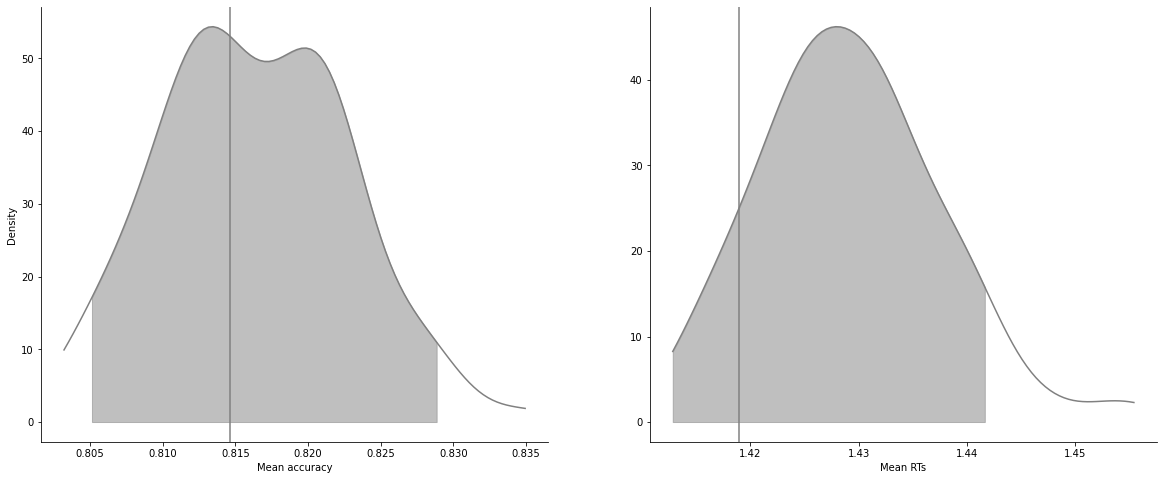

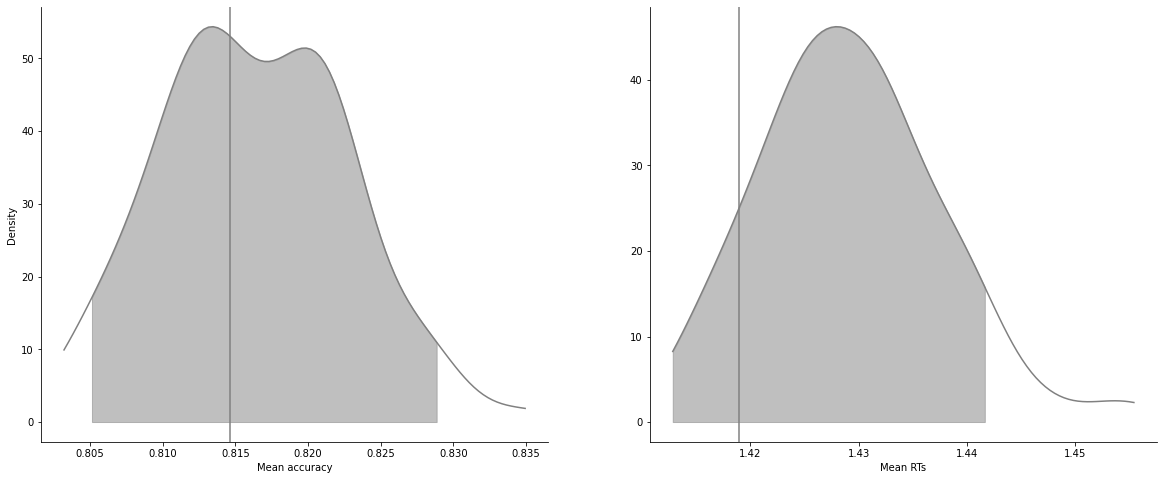

In [16]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI')

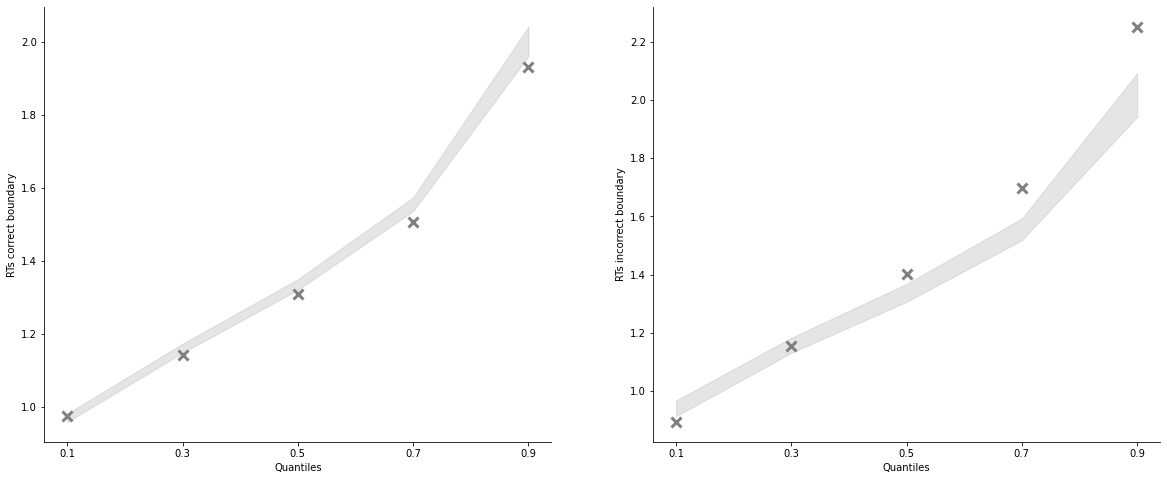

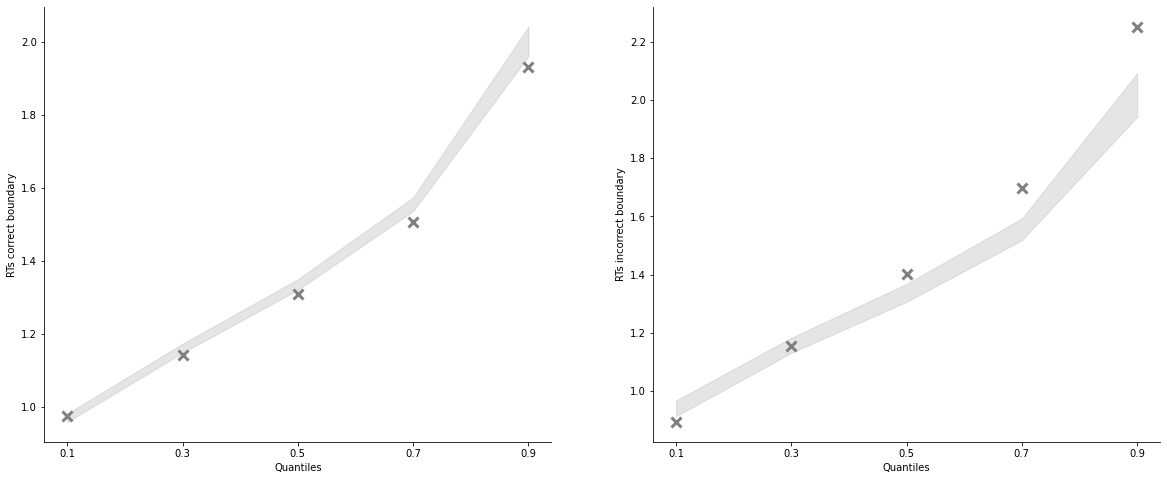

In [17]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades')

In [18]:
import numpy as np

In [19]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [20]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0,2,AB,1
1,1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0,1,CD,1
2,2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0,2,BD,1
3,3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0,2,CD,1
4,4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0,1,CD,1


In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1            0.813780  1.434645  1.506335   
                        2            0.813780  1.421802  1.408471   
                        3            0.834264  1.425701  2.786443   
                        4            0.828678  1.441704  2.261217   
                        5            0.862197  1.392957  1.561590   
...                                       ...       ...       ...   
3.0         CD          96           0.805556  1.434929  2.662859   
                        97           0.848148  1.406045  1.293612   
                        98           0.801852  1.416132  1.455323   
                        99           0.842593  1.426774  1.413647   
                        100          0.803704  1.451096  1.891283   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.208097             1.153072   
                        2                    1.188743             1.132946   
                        3                    1.231007             1.142028   
                        4                    1.158149             1.151563   
                        5                    1.164998             1.140908   
...                                               ...                  ...   
3.0         CD          96                   1.258070             1.162867   
                        97                   1.171808             1.125176   
                        98                   1.107222             1.172873   
                        99                   1.240377             1.153296   
                        100                  1.170205             1.161109   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.428592             1.319905   
                        2                    1.390157             1.325046   
                        3                    1.365099             1.308629   
                        4                    1.326760             1.303308   
                        5                    1.339867             1.284066   
...                                               ...                  ...   
3.0         CD          96                   1.438194             1.336463   
                        97                   1.313851             1.326901   
                        98                   1.296773             1.332621   
                        99                   1.428033             1.324303   
                        100                  1.351668             1.320151   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1.0         AB          1                    1.738301             1.592655  
                        2                    1.626286             1.535339  
                        3                    1.635950             1.554902  
                        4                    1.609846             1.545129  
                        5                    1.583332             1.497308  
...                                               ...                  ...  
3.0         CD          96                   1.641050             1.555273  
                        97                   1.609275             1.531926  
                        98                   1.447820             1.582065  
                        99                   1.636703             1.508438  
                        100                  1.578289             1.551031  

[1200 rows x 9 columns]

In [24]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.801235  1.426323  1.199745               1.135681   
           2            0.793827  1.442715  1.544201               1.122583   
           3            0.817284  1.423955  1.891851               1.124689   
           4            0.818519  1.443058  1.705463               1.169881   
           5            0.829630  1.428080  2.027813               1.137542   
...                          ...       ...       ...                    ...   
8          96           0.809824  1.468487  1.953682               1.199295   
           97           0.833753  1.411856  1.208481               1.130744   
           98           0.818640  1.408953  1.450242               1.176023   
           99           0.803526  1.425934  1.522895               1.137050   
           100          0.798489  1.396271  1.886472               1.129234   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.177682               1.364409   
           2                  1.198899               1.277585   
           3                  1.159334               1.326422   
           4                  1.179347               1.344941   
           5                  1.139911               1.347546   
...                                ...                    ...   
8          96                 1.174649               1.391773   
           97                 1.149908               1.322863   
           98                 1.134037               1.326317   
           99                 1.156272               1.360092   
           100                1.137936               1.284514   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.338228               1.546828   
           2                  1.380085               1.540051   
           3                  1.331121               1.535166   
           4                  1.350146               1.504061   
           5                  1.327417               1.558505   
...                                ...                    ...   
8          96                 1.370599               1.579984   
           97                 1.333476               1.543576   
           98                 1.314014               1.588802   
           99                 1.340613               1.551743   
           100                1.311133               1.555684   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.560567  
           2                  1.585393  
           3                  1.565298  
           4                  1.607854  
           5                  1.543440  
...                                ...  
8          96                 1.600103  
           97                 1.560344  
           98                 1.544645  
           99                 1.571197  
           100                1.520319  

[800 rows x 9 columns]

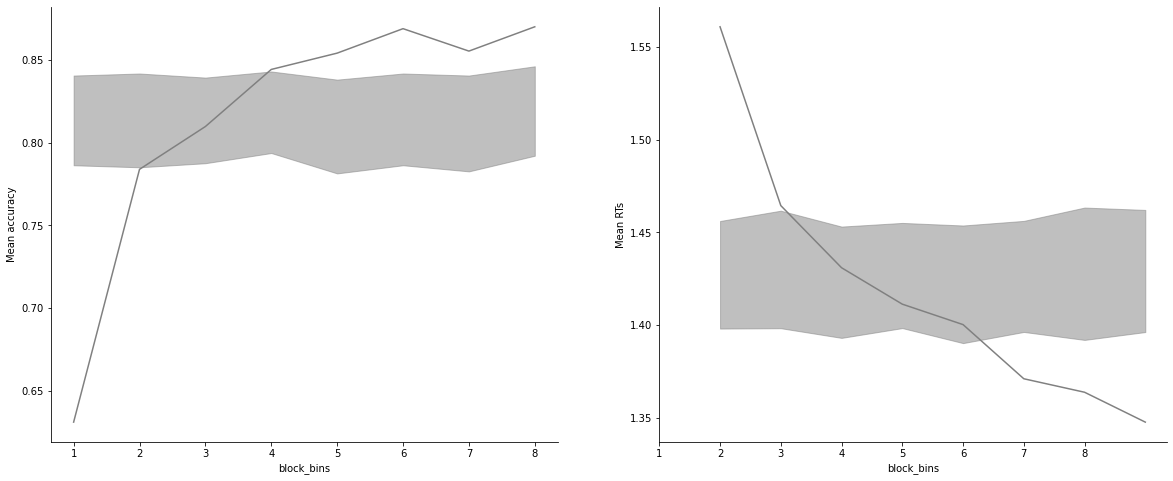

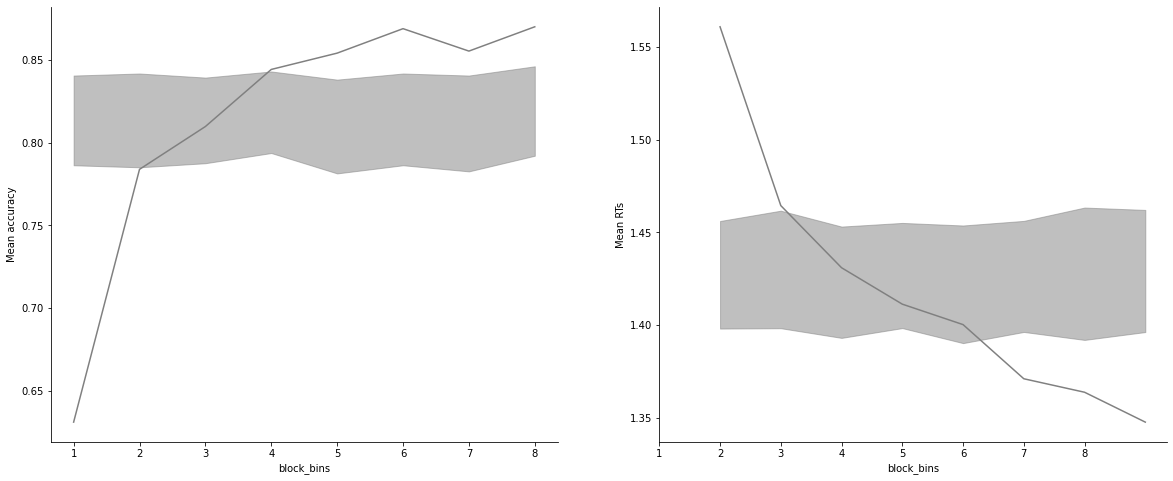

In [25]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8))

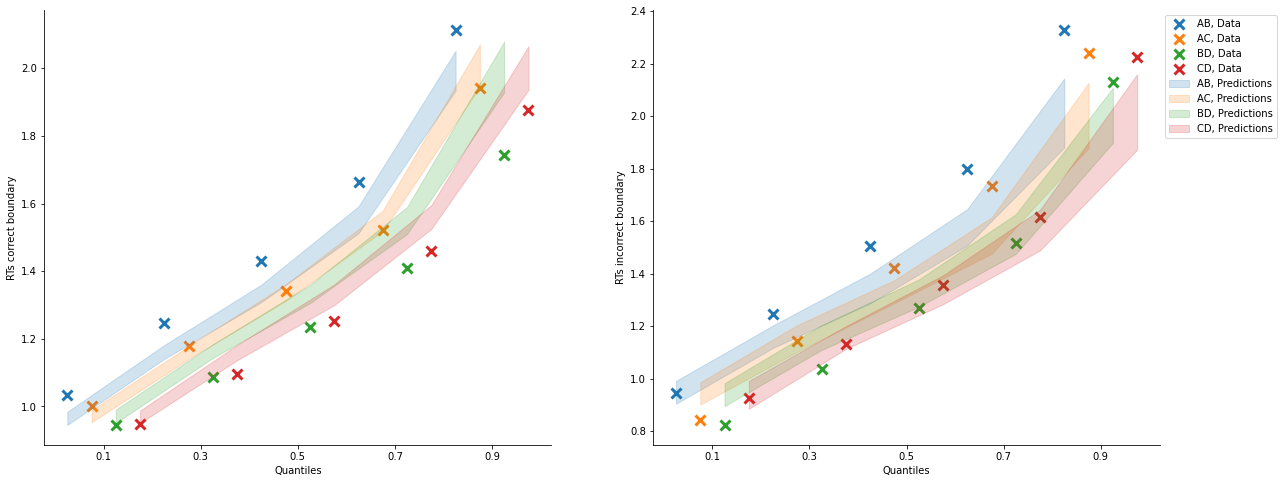

In [23]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

### Get last values for eventual further sampling

In [26]:
sv = model_fit.last_values
sv

,chain,draw,warmup,mu_drift_cor,mu_drift_inc,mu_ndt,mu_threshold,sd_drift_cor,sd_drift_inc,sd_ndt,...,z_threshold[26],z_threshold[27],z_threshold[2],z_threshold[3],z_threshold[4],z_threshold[5],z_threshold[6],z_threshold[7],z_threshold[8],z_threshold[9]
499,0,499,0,2.069530,-0.387466,-0.277144,1.605130,0.446111,1.092376,0.275708,...,-1.603833,1.010567,0.433592,-0.328584,-0.018379,0.475423,-1.492094,1.522214,0.660384,1.452295
999,1,499,0,1.995174,0.329033,-0.273237,1.777107,0.556212,0.824403,0.297919,...,0.821210,0.236372,-0.279421,-0.221699,-0.573400,0.487353,-1.542226,0.620516,0.338247,1.377012
